In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [19]:
train = pd.read_csv('./data/bank_customer/train.csv')
test = pd.read_csv('./data/bank_customer/test.csv')
sample = pd.read_csv('./data/bank_customer/submit_sample.csv', header=None)

In [20]:
trainX = train.iloc[:, 0:17]
trainX.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success


In [21]:
y =  train['y']

In [22]:
testX = test.copy()

In [23]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

In [24]:
clf1 = DT(max_depth=2, min_samples_leaf=500)

In [25]:
cross_validate(clf1, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.04926729, 0.04475689, 0.04526043, 0.04326057, 0.04576874]),
 'score_time': array([0.0050025 , 0.00501084, 0.00451088, 0.00401092, 0.00550056]),
 'test_score': array([0.74657601, 0.76182968, 0.73117591, 0.73707281, 0.75910043]),
 'train_score': array([0.74534692, 0.74543889, 0.75305367, 0.75162494, 0.746135  ])}

In [26]:
clf2 = DT(max_depth=10, min_samples_leaf=500)
cross_validate(clf2, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.10431743, 0.11090398, 0.11340737, 0.11140919, 0.10540771]),
 'score_time': array([0.00359011, 0.00400162, 0.00406718, 0.00406933, 0.00400186]),
 'test_score': array([0.88264002, 0.88482571, 0.86778474, 0.8924153 , 0.88343681]),
 'train_score': array([0.88842017, 0.89038512, 0.89288003, 0.8876343 , 0.885615  ])}

In [27]:
clf3 = DT()

In [28]:
parameters = {"max_depth":list(range(2,11))}

In [29]:
gcv = GridSearchCV(clf3, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(trainX, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='roc_auc')

In [30]:
gcv.cv_results_

{'mean_fit_time': array([0.06088586, 0.08544326, 0.11217909, 0.13852596, 0.19957714,
        0.21397061, 0.24450688, 0.25454664, 0.23016028]),
 'std_fit_time': array([0.00734291, 0.02254189, 0.01209232, 0.02202916, 0.0496481 ,
        0.0583172 , 0.07275768, 0.0296361 , 0.02343801]),
 'mean_score_time': array([0.00719581, 0.0060236 , 0.00662866, 0.00551724, 0.0091969 ,
        0.00647182, 0.00563269, 0.00624442, 0.00461354]),
 'std_score_time': array([0.0043052 , 0.00092795, 0.00183944, 0.00062474, 0.00430594,
        0.00235386, 0.0005956 , 0.00128675, 0.00094994]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

In [32]:
train_score = gcv.cv_results_["mean_train_score"]
test_score = gcv.cv_results_["mean_test_score"]
train_score

array([0.74831988, 0.8124462 , 0.84413528, 0.85726064, 0.86924925,
       0.88601102, 0.89891244, 0.91025077, 0.92417332])

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (8).

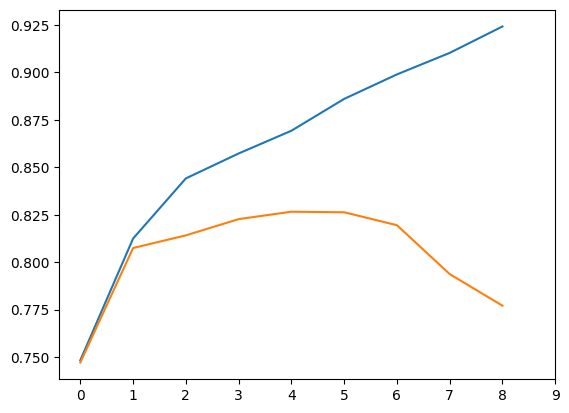

In [35]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks([0,1,2,3,4,5,6,7,8,9],[2,3,4,5,6,7,8,9])

In [36]:
gcv.best_params_

{'max_depth': 6}

In [38]:
pred = gcv.predict_proba(testX)
pred = pred[:,1]

In [39]:
sample[1] = pred
sample.to_csv('./data/bank_customer/submit3_bank.csv', index=None, header=None)

In [43]:
clf4 = DT()
parameters2 = {"max_depth":list(range(2,11)), "min_samples_leaf":[5,10,20,50,100,500]}
gcv2 = GridSearchCV(clf4, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv2.fit(trainX, y)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [45]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

In [46]:
pred2 = gcv2.predict_proba(testX)
pred2 = pred2[:,1]

In [ ]:
sample[1] = pred2
sample.to_csv('./data/bank_customer/submit4_bank.csv', index=None, header=None)